# Documentação

`!pip install yfinance`

### Artigo original:
https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

### Modelo ARIMA:
https://pt.wikipedia.org/wiki/ARIMA

### Uso do Auto-ARIMA:
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd



## Requisitos
~~~python
!pip install yfinance
~~~

In [1]:
ticker = input('Insira o código do papel:')

Insira o código do papel:VILG11.SA


In [2]:
n_steps = int(input('Quantas predições deseja?'))

Quantas predições deseja?50


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from functions import get_finance_data, get_forecast, get_auto_arima

plt.style.use('fivethirtyeight')

In [4]:
#ticker = "RBBV11.SA"
data = get_finance_data(ticker)
train = data['Low'][:len(data)-n_steps]
test = data['Low'][-n_steps:]

In [5]:
arima_model = get_auto_arima(ticker)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1282.687, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1402.659, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1338.176, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1277.432, Time=0.24 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1396.136, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1279.430, Time=0.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1279.430, Time=0.85 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1338.598, Time=0.13 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1281.160, Time=1.76 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1278.874, Time=0.33 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1278.427, Time=0.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1276.888, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1395.961, Time=0.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1278.881, Time=0.31 sec
 ARIMA(1,1,0)(0,1,2

In [6]:
def desvio(registro):
    return ((registro['predição']/registro['valor'])-1)*100

In [13]:
df = pd.DataFrame({'predição':arima_model.predict(n_periods=n_steps),'valor':test}, index=test.index)
df['desvio (%)'] = df.apply(desvio, axis=1)
prd = df
df


,predição,valor,desvio (%)
Date,,,
2020-10-13,121.670884,132.600006,-8.242173
2020-10-14,122.177061,133.119995,-8.220353
2020-10-15,122.493732,133.110001,-7.975561
2020-10-16,123.014589,132.600006,-7.228821
2020-10-19,122.648162,131.000000,-6.375449
2020-10-20,123.206453,131.000000,-5.949272
2020-10-21,123.425742,131.259995,-5.968499
2020-10-22,123.230435,130.259995,-5.396560
2020-10-23,123.085385,130.259995,-5.507915


<function matplotlib.pyplot.show(*args, **kw)>

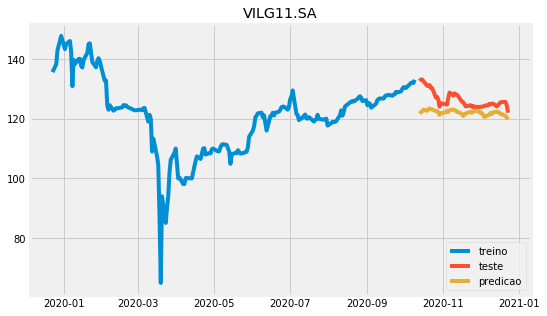

In [11]:
plt.figure(figsize=(8,5))
plt.plot(train, label="treino")
plt.plot(test, label="teste")
plt.plot(prd['predição'], label="predicao")
plt.legend(loc='lower right')
plt.title(label=ticker)
plt.show